#  Library & Data Import & Details

In [21]:
import numpy as np
import pandas as pd
import sklearn
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report,accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM



from pylab import rcParams
rcParams['figure.figsize'] = 14, 8









RANDOM_SEED = 42
LABELS = ["Normal", "Fraud"]

from imblearn.combine import SMOTETomek # over sampling method 1



## RandomOverSampler to handle imbalanced data
from imblearn.over_sampling import RandomOverSampler # over sampling method 2



from imblearn.under_sampling import NearMiss

from collections import Counter

In [2]:
data = pd.read_csv('creditcard.csv',sep=',')
data.head(2)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0


In [4]:
# data.info()

In [5]:
data.shape

(284807, 31)

In [6]:
columns = data.columns.tolist()
# Filter the columns to remove data we do not want 
columns = [c for c in columns if c not in ["Class"]]
# Store the variable we are predicting 
target = "Class"
# Define a random state 
state = np.random.RandomState(42)
X = data[columns]
Y = data[target]
X_outliers = state.uniform(low=0, high=1, size=(X.shape[0], X.shape[1]))
# Print the shapes of X & Y
print(X.shape)
print(Y.shape)

(284807, 30)
(284807,)


# Exploratory Data Analysis

In [7]:
data.isnull().values.any()

False

Text(0, 0.5, 'Frequency')

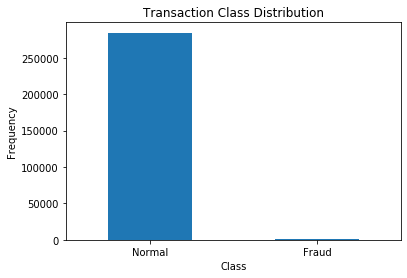

In [8]:
count_classes = pd.value_counts(data['Class'], sort = True)

count_classes.plot(kind = 'bar', rot=0)

plt.title("Transaction Class Distribution")

plt.xticks(range(2), LABELS)

plt.xlabel("Class")

plt.ylabel("Frequency")

In [9]:
class_count_0 , class_count_1 = data.Class.value_counts()

print("class count 0 : ", class_count_0)
print("class count 1 : ", class_count_1)

print(data.Class.value_counts())

class count 0 :  284315
class count 1 :  492
0    284315
1       492
Name: Class, dtype: int64


In [10]:
## Get the Fraud and the normal dataset 

fraud = data[data['Class']==1]

normal = data[data['Class']==0]

In [11]:
print(fraud.shape,normal.shape)

(492, 31) (284315, 31)


# Under Sampling

In [13]:
# Implementing Undersampling for Handling Imbalanced 
# nm = NearMiss(random_state=42)

nm = NearMiss()


X_1,y_1  =   nm.fit_sample(X,Y)


In [14]:
X_1.shape,      y_1.shape

((984, 30), (984,))

In [15]:
y_1.value_counts()

1    492
0    492
Name: Class, dtype: int64

In [16]:

print('Original dataset shape {}'.format(Counter(Y)))
print('Resampled dataset shape {}'.format(Counter(y_1)))


Original dataset shape Counter({0: 284315, 1: 492})
Resampled dataset shape Counter({0: 492, 1: 492})


In [ ]:
# from imblearn.under_sampling import TomekLinks

# tl = TomekLinks()

# X_tl, y_tl, id_tl = tl.fit_sample(X, Y)

In [ ]:
X_tl.shape,    y_tl.shape,    id_tl.shape

# Over sampling

In [17]:
# Implementing Oversampling for Handling Imbalanced 


smk = SMOTETomek(random_state=42)

# smk = SMOTETomek()

X_2,y_2=smk.fit_sample(X,Y)

In [18]:
X_2.shape,      y_2.shape

((567562, 30), (567562,))

In [25]:
X_2.value_counts() # dataframe can not give value deatils , only work for series

AttributeError: 'DataFrame' object has no attribute 'value_counts'

In [19]:
y_2.value_counts()

1    283781
0    283781
Name: Class, dtype: int64

In [20]:
print('Original dataset shape {}'.format(Counter(Y)))
print('Resampled dataset shape {}'.format(Counter(y_2)))

Original dataset shape Counter({0: 284315, 1: 492})
Resampled dataset shape Counter({0: 283781, 1: 283781})


In [22]:
## RandomOverSampler to handle imbalanced data

# os =  RandomOverSampler(ratio=0.5)
os =  RandomOverSampler()

In [23]:
X_train_1, y_train_1 = os.fit_sample(X, Y)

In [24]:
X_train_1.shape,   y_train_1.shape

((568630, 30), (568630,))

In [26]:
y_train_1.value_counts()

1    284315
0    284315
Name: Class, dtype: int64

In [28]:
print('Original dataset shape {}'.format(Counter(Y)))

print('Resampled dataset shape {}'.format(Counter(y_2)))

print('Resampled dataset shape {}'.format(Counter(y_train_1)))



Original dataset shape Counter({0: 284315, 1: 492})
Resampled dataset shape Counter({0: 283781, 1: 283781})
Resampled dataset shape Counter({0: 284315, 1: 284315})


In [33]:
class_0_size , class_1_size = Counter(y_train_1)

class_0_size , class_1_size

(0, 1)

In [34]:
class_0_size_2 , class_1_size_2 = data.Class.value_counts()

class_0_size_2 , class_1_size_2

(284315, 492)

In [35]:
class_0_size_3 , class_1_size_3 = data.shape

class_0_size_3 , class_1_size_3

(284807, 31)